# Denoising Autoencoder



In [1]:
import os
import sys
import inspect
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from tqdm import tqdm
from torchvision import datasets

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, os.path.join(parentdir, 'scripts'))
sys.path.insert(0, os.path.join(parentdir, 'models'))

import models as m
import helpers
%matplotlib inline

In [2]:
image_transforms = transforms.Compose([transforms.ToTensor()])

train_data = datasets.MNIST(root='data', train=True, download=True, transform=image_transforms)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=image_transforms)

batch_size = 32
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=0)

In [3]:
learned_transform = helpers.GaussianNoise(std=0.375)

In [4]:
model = m.ConvAutoencoder()
model

ConvAutoencoder(
  (conv_1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pooling_func): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (trans_conv_1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (trans_conv_2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
)

In [5]:
helpers.train_denoising_autoencoder(model, train_loader, epochs=15, learned_transform=learned_transform);

  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

Training on cuda:0


  1%|▌                                                                              | 14/1875 [00:00<00:13, 136.22it/s]

epoch: 1 Loss: 0.041758


  1%|▌                                                                              | 12/1875 [00:00<00:16, 114.36it/s]

epoch: 2 Loss: 0.022335


  1%|▌                                                                              | 13/1875 [00:00<00:14, 128.47it/s]

epoch: 3 Loss: 0.021367


  1%|▌                                                                              | 14/1875 [00:00<00:13, 133.90it/s]

epoch: 4 Loss: 0.020731


  1%|▌                                                                              | 12/1875 [00:00<00:16, 114.86it/s]

epoch: 5 Loss: 0.020184


  1%|▌                                                                              | 13/1875 [00:00<00:15, 122.48it/s]

epoch: 6 Loss: 0.019830


  1%|▋                                                                              | 15/1875 [00:00<00:13, 140.71it/s]

epoch: 7 Loss: 0.019597


  1%|▌                                                                              | 14/1875 [00:00<00:14, 132.43it/s]

epoch: 8 Loss: 0.019456


  1%|▌                                                                              | 13/1875 [00:00<00:14, 127.36it/s]

epoch: 9 Loss: 0.019315


  1%|▍                                                                              | 11/1875 [00:00<00:16, 109.81it/s]

epoch: 10 Loss: 0.019201


  1%|▌                                                                              | 13/1875 [00:00<00:15, 122.52it/s]

epoch: 11 Loss: 0.019111


  2%|█▍                                                                             | 34/1875 [00:00<00:10, 167.94it/s]

epoch: 12 Loss: 0.019039


  1%|▋                                                                              | 17/1875 [00:00<00:11, 163.44it/s]

epoch: 13 Loss: 0.018965


  2%|█▍                                                                             | 34/1875 [00:00<00:11, 161.78it/s]

epoch: 14 Loss: 0.018908


100%|█████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:11<00:00, 168.82it/s]

epoch: 15 Loss: 0.018851


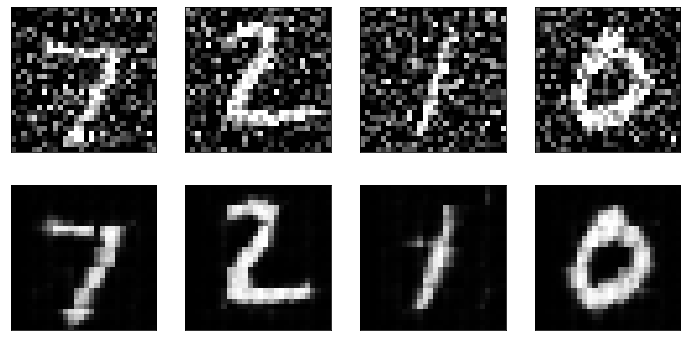

In [6]:
helpers.visualize_inputs_outputs(model, test_loader, learned_transform=learned_transform)
plt.show()